In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import pymysql

In [3]:
import yfinance as yf

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [5]:
spx = yf.Ticker('^SPX')

In [5]:
spx.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 4958.61,
 'open': 4957.19,
 'dayLow': 4918.09,
 'dayHigh': 4957.19,
 'regularMarketPreviousClose': 4958.61,
 'regularMarketOpen': 4957.19,
 'regularMarketDayLow': 4918.09,
 'regularMarketDayHigh': 4957.19,
 'volume': 997895027,
 'regularMarketVolume': 997895027,
 'averageVolume': 3920228196,
 'averageVolume10days': 4033212000,
 'averageDailyVolume10Day': 4033212000,
 'bid': 4936.38,
 'ask': 4938.14,
 'fiftyTwoWeekLow': 3808.86,
 'fiftyTwoWeekHigh': 4975.29,
 'fiftyDayAverage': 4726.76,
 'twoHundredDayAverage': 4441.8345,
 'currency': 'USD',
 'exchange': 'WCB',
 'quoteType': 'INDEX',
 'symbol': '^SPX',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500 INDEX',
 'longName': 'S&P 500 INDEX',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EST',
 'uuid': '598377dc-b757-301a-9621-bbef63eca4d0',
 'messageBoardId': 'finmb_INDEXSPX',
 'gmtOffSetMilliseconds': -18000000,
 'trailingPegR

In [51]:
spx.options #prints expiration dates for which yfinance has data

('2024-02-05',
 '2024-02-06',
 '2024-02-07',
 '2024-02-08',
 '2024-02-09',
 '2024-02-12',
 '2024-02-13',
 '2024-02-14',
 '2024-02-15',
 '2024-02-16',
 '2024-02-20',
 '2024-02-21',
 '2024-02-22',
 '2024-02-23',
 '2024-02-26',
 '2024-02-27',
 '2024-02-28',
 '2024-02-29',
 '2024-03-01',
 '2024-03-04',
 '2024-03-05',
 '2024-03-06',
 '2024-03-07',
 '2024-03-08',
 '2024-03-11',
 '2024-03-12',
 '2024-03-15',
 '2024-03-18',
 '2024-03-22',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-07-31',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [6]:
spx_cur_opt = spx.option_chain('2024-02-06')

In [7]:
spx_cur_opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240206C04250000,2024-02-06 18:26:24+00:00,4250.0,691.79,692.0,692.50,39.059998,5.984097,3.0,3,0.000010,True,REGULAR,USD
1,SPXW240206C04300000,2024-01-16 17:14:57+00:00,4300.0,477.70,642.3,642.70,0.000000,0.000000,1.0,1,0.000010,True,REGULAR,USD
2,SPXW240206C04400000,2024-02-05 16:02:50+00:00,4400.0,540.34,542.7,543.30,16.410034,3.132104,5.0,5,0.000010,True,REGULAR,USD
3,SPXW240206C04425000,2024-02-06 17:05:58+00:00,4425.0,513.27,518.3,518.70,9.230011,1.831206,2.0,2,0.000010,True,REGULAR,USD
4,SPXW240206C04460000,2024-02-01 17:10:14+00:00,4460.0,428.00,482.8,483.30,0.000000,0.000000,NaN,1,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,SPXW240206C05300000,2024-02-02 20:13:29+00:00,5300.0,0.05,0.0,0.05,0.000000,0.000000,1.0,204,0.447271,False,REGULAR,USD
126,SPXW240206C05400000,2024-02-06 14:56:47+00:00,5400.0,0.05,0.0,0.05,-0.050000,-50.000000,2.0,10,0.523442,False,REGULAR,USD
127,SPXW240206C05500000,2024-02-06 14:51:06+00:00,5500.0,0.05,0.0,0.05,-0.050000,-50.000000,2.0,6,0.625004,False,REGULAR,USD
128,SPXW240206C05600000,2024-01-26 18:55:14+00:00,5600.0,0.05,0.0,0.05,0.000000,0.000000,8.0,8,0.718753,False,REGULAR,USD


In [45]:
spx.history(period='1 day')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4944.990234,1335647341,0.0,0.0


In [8]:
spx_cur_calls = spx_cur_opt.calls
spx_cur_puts = spx_cur_opt.puts

In [21]:
spx_cur_calls[(spx_cur_calls['strike'] >= 4700) & (spx_cur_calls['strike'] <= 5200)]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
62,SPXW240205C04700000,2024-02-02 20:51:21+00:00,4700.0,227.90,247.0,247.60,-39.980010,-14.924597,4.0,155,0.431890,True,REGULAR,USD
63,SPXW240205C04705000,2024-01-22 18:09:03+00:00,4705.0,161.99,242.2,242.90,0.000000,0.000000,8.0,23,0.455938,True,REGULAR,USD
64,SPXW240205C04710000,2024-02-02 19:31:27+00:00,4710.0,218.40,237.3,237.90,-37.600006,-14.687502,12.0,44,0.447637,True,REGULAR,USD
65,SPXW240205C04715000,2024-02-02 15:44:10+00:00,4715.0,221.79,231.7,234.80,0.000000,0.000000,1.0,77,0.546025,True,REGULAR,USD
66,SPXW240205C04720000,2024-02-05 17:39:21+00:00,4720.0,226.21,227.4,228.00,43.590010,23.869242,42.0,99,0.439459,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,SPXW240205C05120000,2024-02-05 14:48:54+00:00,5120.0,0.05,0.0,0.05,0.000000,0.000000,24.0,544,0.235359,False,REGULAR,USD
143,SPXW240205C05125000,2024-02-02 21:08:55+00:00,5125.0,0.05,0.0,0.05,0.000000,0.000000,270.0,610,0.242195,False,REGULAR,USD
144,SPXW240205C05150000,2024-02-02 21:09:19+00:00,5150.0,0.05,0.0,0.05,0.000000,0.000000,664.0,990,0.271492,False,REGULAR,USD
145,SPXW240205C05175000,2024-02-02 21:13:26+00:00,5175.0,0.05,0.0,0.05,0.000000,0.000000,1577.0,2796,0.300788,False,REGULAR,USD


In [9]:
spx_cur_calls[(spx_cur_calls['strike'] >= 4900) & (spx_cur_calls['strike'] <= 5000)]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
77,SPXW240206C04900000,2024-02-06 19:47:04+00:00,4900.0,41.91,42.50,43.10,1.209999,2.972971,1542.0,1740,0.000010,True,REGULAR,USD
78,SPXW240206C04905000,2024-02-06 19:50:13+00:00,4905.0,39.00,38.00,38.60,3.040001,8.453840,165.0,202,0.000010,True,REGULAR,USD
79,SPXW240206C04910000,2024-02-06 19:51:26+00:00,4910.0,33.75,32.50,33.10,1.240002,3.814216,461.0,261,0.000010,True,REGULAR,USD
80,SPXW240206C04915000,2024-02-06 19:54:36+00:00,4915.0,28.71,28.40,28.90,3.029999,11.799061,1135.0,307,0.043955,True,REGULAR,USD
81,SPXW240206C04920000,2024-02-06 19:53:57+00:00,4920.0,22.40,22.90,23.40,-1.040001,-4.436864,1726.0,442,0.000010,True,REGULAR,USD
82,SPXW240206C04925000,2024-02-06 19:55:06+00:00,4925.0,19.00,18.60,19.00,-0.650000,-3.307886,1887.0,992,0.038950,True,REGULAR,USD
83,SPXW240206C04930000,2024-02-06 19:54:32+00:00,4930.0,14.00,12.80,13.30,-2.629999,-15.814789,5150.0,461,0.000010,True,REGULAR,USD
84,SPXW240206C04935000,2024-02-06 19:54:40+00:00,4935.0,9.74,9.40,9.80,-3.490000,-26.379438,12930.0,529,0.037119,True,REGULAR,USD
85,SPXW240206C04940000,2024-02-06 19:54:58+00:00,4940.0,6.00,5.80,6.00,-4.530000,-43.019943,38805.0,936,0.036280,True,REGULAR,USD
86,SPXW240206C04945000,2024-02-06 19:55:03+00:00,4945.0,3.10,3.00,3.20,-5.270000,-62.962960,56630.0,907,0.036158,False,REGULAR,USD


In [10]:
#build sequence of butterflys
#long 1 call at strike x, short 2 calls at strike x + alpha, long 1 call at strike x + 2 * alpha
# if underlying price <= x, none of calls are exercised for payoff of 0

# if x < underlying <= x + alpha, the 1 long call held at strike x is exercised for some multiple * (underyling - x) payoff

# if x + alpha < underlying <= x + 2 * alpha, the long call at strike x and the 2 calls at strike x + alpha are exercised 
# for a payoff of some multiple * (alpha) - (underlying - (x + alpha))

# else underlying > x + 2 * alpha, payoff of 0

# idea is value of the portfolio = Present Value of the Expected value of the payoff 
# = present value of probability of (x < underlying <= x + 2*alpha) * payoff in this scenario 

#since we will be dealing with options on their expiration date, can remove present value computation so that
# value of portfollio = probability of (x < underlying <= x + 2*alpha) * payoff in this scenario 

# area/base = 1/2 * (2 alpha) * alpha = alpha ** 2 / 2*alpha = alpha/2

#value of portfollio = probability of (x < underlying <= x + 2*alpha) * alpha/2

spx_4900_5000 = spx_cur_calls[(spx_cur_calls['strike'] >= 4900) & (spx_cur_calls['strike'] <= 5000)]
spx_4900_5000 = spx_4900_5000.reset_index(drop=True).sort_values(by=['strike'])
d = {'interval': [], 'probability': []}
for i in range(0, spx_4900_5000.shape[0]-1):
    lb_strike = spx_4900_5000.iloc[i]['strike']
    rb_strike = spx_4900_5000.iloc[i+1]['strike']
    interp_bid = (spx_4900_5000.iloc[i]['bid'] + spx_4900_5000.iloc[i+1]['bid'])/2
    current_val = spx_4900_5000.iloc[i]['ask'] + spx_4900_5000.iloc[i+1]['ask'] - (2 * interp_bid)
    avg_payoff = ((rb_strike -  lb_strike)/2)**2
    prob = current_val/avg_payoff
    d['interval'].append([lb_strike, rb_strike])
    d['probability'].append(max([0,prob]))

df = pd.DataFrame(data=d)


In [12]:
df['normalized'] = df.apply(func=lambda x: x['probability']/df['probability'].sum(),axis=1)

In [13]:
df

,interval,probability,normalized
0,"[4900.0, 4905.0]",0.192,0.125654
1,"[4905.0, 4910.0]",0.192,0.125654
2,"[4910.0, 4915.0]",0.176,0.115183
3,"[4915.0, 4920.0]",0.160,0.104712
4,"[4920.0, 4925.0]",0.144,0.094241
5,"[4925.0, 4930.0]",0.144,0.094241
6,"[4930.0, 4935.0]",0.144,0.094241
7,"[4935.0, 4940.0]",0.096,0.062827
8,"[4940.0, 4945.0]",0.064,0.041885
9,"[4945.0, 4950.0]",0.040,0.026178


In [14]:
spx_cur_puts[(spx_cur_puts['strike'] >= 4900) & (spx_cur_puts['strike'] <= 5000)]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
110,SPXW240206P04900000,2024-02-06 19:53:56+00:00,4900.0,0.07,0.05,0.10,-1.280000,-94.814810,34285.0,3814,0.077646,False,REGULAR,USD
111,SPXW240206P04905000,2024-02-06 19:54:03+00:00,4905.0,0.07,0.05,0.10,-1.680000,-96.000000,17903.0,1558,0.070078,False,REGULAR,USD
112,SPXW240206P04910000,2024-02-06 19:54:45+00:00,4910.0,0.05,0.05,0.10,-2.280000,-97.854080,33901.0,1460,0.062143,False,REGULAR,USD
113,SPXW240206P04915000,2024-02-06 19:55:06+00:00,4915.0,0.12,0.10,0.15,-2.950000,-96.091210,37502.0,1953,0.057871,False,REGULAR,USD
114,SPXW240206P04920000,2024-02-06 19:54:46+00:00,4920.0,0.15,0.15,0.20,-3.850000,-96.250000,54827.0,2808,0.051889,False,REGULAR,USD
115,SPXW240206P04925000,2024-02-06 19:55:05+00:00,4925.0,0.22,0.20,0.25,-5.020000,-95.801530,56012.0,1860,0.044809,False,REGULAR,USD
116,SPXW240206P04930000,2024-02-06 19:54:58+00:00,4930.0,0.45,0.45,0.50,-6.290000,-93.323450,64660.0,1573,0.041636,False,REGULAR,USD
117,SPXW240206P04935000,2024-02-06 19:55:05+00:00,4935.0,1.00,1.00,1.10,-7.729999,-88.545240,49939.0,1357,0.039713,False,REGULAR,USD
118,SPXW240206P04940000,2024-02-06 19:55:05+00:00,4940.0,2.32,2.30,2.35,-8.700001,-78.947370,60233.0,1828,0.038706,False,REGULAR,USD
119,SPXW240206P04945000,2024-02-06 19:55:00+00:00,4945.0,4.50,4.50,4.70,-9.300000,-67.391304,26758.0,1292,0.039866,True,REGULAR,USD


In [15]:
spx_4900_5000 = spx_cur_puts[(spx_cur_puts['strike'] >= 4900) & (spx_cur_puts['strike'] <= 5000)]
spx_4900_5000 = spx_4900_5000.reset_index(drop=True).sort_values(by=['strike'])
d = {'interval': [], 'probability': []}
for i in range(0, spx_4900_5000.shape[0]-1):
    lb_strike = spx_4900_5000.iloc[i]['strike']
    rb_strike = spx_4900_5000.iloc[i+1]['strike']
    interp_bid = (spx_4900_5000.iloc[i]['bid'] + spx_4900_5000.iloc[i+1]['bid'])/2
    current_val = spx_4900_5000.iloc[i]['ask'] + spx_4900_5000.iloc[i+1]['ask'] - (2 * interp_bid)
    avg_payoff = ((rb_strike -  lb_strike)/2)**2
    prob = current_val/avg_payoff
    d['interval'].append([lb_strike, rb_strike])
    d['probability'].append(max([0,prob]))

df = pd.DataFrame(data=d)

In [16]:
df['normalized'] = df.apply(func=lambda x: x['probability']/df['probability'].sum(),axis=1)
df

,interval,probability,normalized
0,"[4900.0, 4905.0]",0.016,0.008230
1,"[4905.0, 4910.0]",0.016,0.008230
2,"[4910.0, 4915.0]",0.016,0.008230
3,"[4915.0, 4920.0]",0.016,0.008230
4,"[4920.0, 4925.0]",0.016,0.008230
5,"[4925.0, 4930.0]",0.016,0.008230
6,"[4930.0, 4935.0]",0.024,0.012346
7,"[4935.0, 4940.0]",0.024,0.012346
8,"[4940.0, 4945.0]",0.040,0.020576
9,"[4945.0, 4950.0]",0.096,0.049383


In [130]:
df = pd.read_csv('spx_2023_24.csv')

In [131]:
df

,Date,Open,High,Low,Close
0,02/05/2024,"4,957.19","4,957.19","4,918.09","4,942.81"
1,02/02/2024,"4,916.06","4,975.29","4,907.99","4,958.61"
2,02/01/2024,"4,861.11","4,906.97","4,853.52","4,906.19"
3,01/31/2024,"4,899.19","4,906.75","4,845.15","4,845.65"
4,01/30/2024,"4,925.89","4,931.09","4,916.27","4,924.97"
...,...,...,...,...,...
246,02/10/2023,"4,068.92","4,094.36","4,060.79","4,090.46"
247,02/09/2023,"4,144.25","4,156.23","4,069.67","4,081.50"
248,02/08/2023,"4,153.47","4,156.85","4,111.67","4,117.86"
249,02/07/2023,"4,105.35","4,176.54","4,088.39","4,164.00"


In [134]:
df['Date'] = df.apply(func = lambda x: datetime.strptime(x['Date'], '%m/%d/%Y').date(), axis=1)

In [74]:
from datetime import datetime, date, timedelta

In [136]:
df = df.sort_values('Date')
df

,Date,Open,High,Low,Close
250,2023-02-06,"4,119.57","4,124.63","4,093.38","4,111.08"
249,2023-02-07,"4,105.35","4,176.54","4,088.39","4,164.00"
248,2023-02-08,"4,153.47","4,156.85","4,111.67","4,117.86"
247,2023-02-09,"4,144.25","4,156.23","4,069.67","4,081.50"
246,2023-02-10,"4,068.92","4,094.36","4,060.79","4,090.46"
...,...,...,...,...,...
4,2024-01-30,"4,925.89","4,931.09","4,916.27","4,924.97"
3,2024-01-31,"4,899.19","4,906.75","4,845.15","4,845.65"
2,2024-02-01,"4,861.11","4,906.97","4,853.52","4,906.19"
1,2024-02-02,"4,916.06","4,975.29","4,907.99","4,958.61"


In [137]:
df = df.reset_index(drop=True)

In [147]:
df['Open'] = df.apply(func = lambda x: float(x['Open'].replace(',','')),axis=1)
df['Close'] = df.apply(func = lambda x: float(x['Close'].replace(',','')),axis=1)

In [148]:
df_daily = df
last_rtn = (df_daily.iloc[df_daily.shape[0]-1]['Close'] - df_daily.iloc[df_daily.shape[0]-1]['Open'])/df_daily.iloc[df_daily.shape[0]-1]['Open']
df_daily['return'] = list((np.array(df_daily['Open'].iloc[1:])-np.array(df_daily['Open'].iloc[:-1]))/np.array(df_daily['Open'].iloc[:-1])) + [last_rtn]
    
dt = 1/251 #mu and sigma estimates are wrt a full year

        

In [154]:
est_mu

0.0007546859513609949

In [96]:
from statsmodels.base.model import GenericLikelihoodModel

In [97]:
from scipy import stats

In [159]:
#dS = u*S*dt + sigma*S*dW => Normal(mean = u*S*dt, variance = sigma^2 * S^2 * dt)
# dS/S = u*dt + sigma*dW => Normal(mean = u * dt, variance = sigma^2 * dt)
#dS/S is the returns we compute


class GaussianMLE(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        if exog is None:
            exog = np.zeros_like(endog)
            
        super(GaussianMLE, self).__init__(endog, exog, **kwds) 
    
    def calc_likelihood(self, endog, mu_ = 0, sigma_ = 1):
        return stats.norm.pdf(endog, loc= mu_, scale = sigma_)
    
    def nloglikeobs(self, params):
        mu = params[0]
        sigma = params[1]

        return -np.log(self.calc_likelihood(self.endog, mu_ = mu, sigma_= sigma))
    
    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        if start_params is None:
            mu_start = self.endog.mean()
            sigma_start = np.std(self.endog)
            start_params = np.array([mu_start, sigma_start])
            
        return super(GaussianMLE, self).fit(start_params=start_params,
                                                    maxiter=maxiter, maxfun=maxfun, **kwds)


model = GaussianMLE(df_daily['return'].iloc[:126].to_numpy())
results = model.fit()
est_mu, est_sigma = results.params


Optimization terminated successfully.
         Current function value: -3.413530
         Iterations: 4
         Function evaluations: 9


In [160]:
est_mu

0.0007295080647864637

In [161]:
est_sigma

0.00796682939642559

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


(array([8.93494065e-06, 1.55999234e-04, 6.21099117e-04, 8.72243395e-04,
        5.37062378e-04, 1.75318025e-04, 3.74301568e-05, 5.55415229e-06,
        9.65939529e-07, 2.41484882e-07]),
 array([3487.46134409, 3901.56594157, 4315.67053904, 4729.77513651,
        5143.87973398, 5557.98433146, 5972.08892893, 6386.1935264 ,
        6800.29812387, 7214.40272135, 7628.50731882]),
 <BarContainer object of 10 artists>)

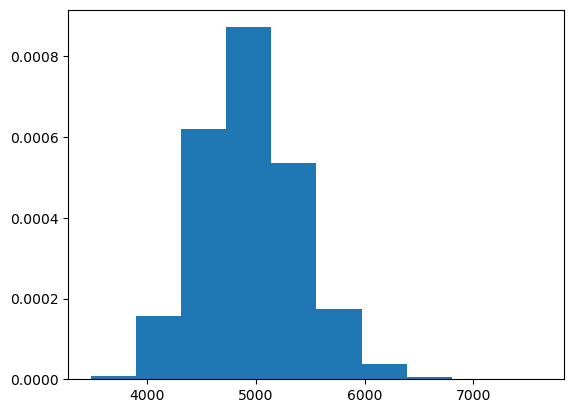

In [162]:
from matplotlib import pyplot as plt

start_dt = df_daily['Date'].iloc[125] + timedelta(days=1)
res_list = []

for i in range(10000):
    cur = start_dt
    idx_val = df_daily['Open'].iloc[126]
    while cur <= date.today():
        if cur.isoweekday() > 5:
            cur+=timedelta(days=1)
            continue
        #dS = u * S * dt + sigma * S * dW
        delta = est_mu * idx_val  + est_sigma * idx_val * stats.norm.rvs()
        idx_val += delta
        cur+=timedelta(days=1)
    res_list.append(idx_val)
    if i % 1000 == 0:
        print(i)


plt.hist(res_list, density=True)


In [20]:
spx.history(period='6mo')[:50]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,0.0,0.0
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,0.0,0.0
2023-08-09 00:00:00-04:00,4501.569824,4502.439941,4461.330078,4467.709961,3803100000,0.0,0.0
2023-08-10 00:00:00-04:00,4487.160156,4527.370117,4457.919922,4468.830078,4504370000,0.0,0.0
2023-08-11 00:00:00-04:00,4450.689941,4476.229980,4443.979980,4464.049805,3753290000,0.0,0.0
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,0.0,0.0
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,0.0,0.0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,0.0,0.0
2023-08-17 00:00:00-04:00,4416.319824,4421.169922,4364.830078,4370.359863,3943700000,0.0,0.0


In [21]:
ndx = yf.Ticker('^NDX')

In [22]:
ndx.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-08 00:00:00-05:00,16354.219727,16655.230469,16349.389648,16649.869141,6337770000,0.0,0.0
2024-01-09 00:00:00-05:00,16531.960938,16710.880859,16513.730469,16678.699219,5068410000,0.0,0.0
2024-01-10 00:00:00-05:00,16702.550781,16827.369141,16654.740234,16793.050781,4404590000,0.0,0.0
2024-01-11 00:00:00-05:00,16852.189453,16898.160156,16618.859375,16820.900391,5044690000,0.0,0.0
2024-01-12 00:00:00-05:00,16855.000000,16900.369141,16776.919922,16832.919922,4958940000,0.0,0.0
2024-01-16 00:00:00-05:00,16775.099609,16895.330078,16726.589844,16830.710938,6386180000,0.0,0.0
2024-01-17 00:00:00-05:00,16705.509766,16749.109375,16561.490234,16736.279297,5181740000,0.0,0.0
2024-01-18 00:00:00-05:00,16894.330078,16996.980469,16818.130859,16982.289062,5587440000,0.0,0.0
2024-01-19 00:00:00-05:00,17060.140625,17317.210938,17041.849609,17314.000000,5604950000,0.0,0.0


In [61]:
spx_daily = spx.history(period='max')
ndx_daily = ndx.history(period='max')

In [62]:
ndx_daily = ndx_daily.reset_index()
ndx_daily = ndx_daily[['Date', 'Open', 'Close']]
spx_daily = spx_daily.reset_index()
spx_daily = spx_daily[['Date', 'Open', 'Close']]
spx_daily['Date'] = spx_daily.apply(func = lambda x: x['Date'].date(), axis=1)
ndx_daily['Date'] = ndx_daily.apply(func = lambda x: x['Date'].date(), axis=1)

In [63]:
ndx_return = (np.array(ndx_daily['Open'].iloc[1:]) - np.array(ndx_daily['Open'].iloc[:-1]))/np.array(ndx_daily['Open'].iloc[:-1])
spx_return = (np.array(spx_daily['Open'].iloc[1:]) - np.array(spx_daily['Open'].iloc[:-1]))/np.array(spx_daily['Open'].iloc[:-1])

spx_daily = spx_daily.iloc[:-1]
ndx_daily = ndx_daily.iloc[:-1]
spx_daily['return'] = pd.Series(data=spx_return)
ndx_daily['return'] = pd.Series(data=ndx_return)

/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_46567/1801640352.py:2: RuntimeWarning: divide by zero encountered in divide
  spx_return = (np.array(spx_daily['Open'].iloc[1:]) - np.array(spx_daily['Open'].iloc[:-1]))/np.array(spx_daily['Open'].iloc[:-1])
/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_46567/1801640352.py:2: RuntimeWarning: invalid value encountered in divide
  spx_return = (np.array(spx_daily['Open'].iloc[1:]) - np.array(spx_daily['Open'].iloc[:-1]))/np.array(spx_daily['Open'].iloc[:-1])


In [41]:
ndx_daily

,Date,Open,Close,return
0,1985-10-01,110.620003,112.139999,0.013741
1,1985-10-02,112.139999,110.824997,-0.011593
2,1985-10-03,110.839996,110.870003,0.000271
3,1985-10-04,110.870003,110.074997,-0.007171
4,1985-10-07,110.074997,108.199997,-0.017034
...,...,...,...,...
9659,2024-01-30,17556.490234,17476.710938,-0.016319
9660,2024-01-31,17269.980469,17137.240234,-0.003068
9661,2024-02-01,17216.990234,17344.710938,0.011555
9662,2024-02-02,17415.939453,17642.730469,0.012560


In [64]:
spx_daily.iloc[13600:13605]

,Date,Open,Close,return
13600,1982-04-16,0.000000,116.809998,NaN
13601,1982-04-19,0.000000,116.699997,inf
13602,1982-04-20,115.800003,115.440002,-0.002763
13603,1982-04-21,115.480003,115.720001,0.002078
13604,1982-04-22,115.720001,117.190002,0.019876


In [65]:
spx_daily['Open'] = spx_daily.apply(func = lambda x: round(x['Open'], 2), axis=1)
spx_daily['Close'] = spx_daily.apply(func = lambda x: round(x['Close'], 2), axis=1)

ndx_daily['Open'] = ndx_daily.apply(func = lambda x: round(x['Open'], 2), axis=1)
ndx_daily['Close'] = ndx_daily.apply(func = lambda x: round(x['Close'], 2), axis=1)

In [47]:
ndx_daily

,Date,Open,Close,return
0,1985-10-01,110.62,112.14,0.013741
1,1985-10-02,112.14,110.82,-0.011593
2,1985-10-03,110.84,110.87,0.000271
3,1985-10-04,110.87,110.07,-0.007171
4,1985-10-07,110.07,108.20,-0.017034
...,...,...,...,...
9659,2024-01-30,17556.49,17476.71,-0.016319
9660,2024-01-31,17269.98,17137.24,-0.003068
9661,2024-02-01,17216.99,17344.71,0.011555
9662,2024-02-02,17415.94,17642.73,0.012560


In [48]:
import json

def get_mysql_credentials():
        with open("mysql_config.json", "r") as jsonfile:
            data = json.load(jsonfile)
        return (data['host'], data['user'], data['password'], data['database'])
    
def get_cursor():
    creds = get_mysql_credentials()
    dbinstance_endpoint = creds[0]
    db_username = creds[1]
    db_pw = creds[2]
    db_name = creds[3]
    connection = pymysql.connect(host = dbinstance_endpoint, user = db_username, password = db_pw, database = db_name, autocommit=True)
    cursor = connection.cursor()
    return cursor

cursor = get_cursor()

In [66]:
spx_daily = spx_daily.iloc[13602:]

In [58]:
ndx_daily['return'].isna().sum()

0

In [67]:
spx_daily['return']

13602   -0.002763
13603    0.002078
13604    0.019876
13605    0.007795
13606    0.001093
           ...   
24134   -0.005420
24135   -0.007773
24136    0.011304
24137    0.008366
24138   -0.001418
Name: return, Length: 10537, dtype: float64

In [69]:
ndx_tups = []
spx_tups = []

for idx, row in ndx_daily.iterrows():
    ndx_tups.append((row['Date'], row['Open'], row['Close'], row['return']))
    
for idx, row in spx_daily.iterrows():
    spx_tups.append((row['Date'], row['Open'], row['Close'], row['return']))

cursor.executemany('INSERT INTO spx VALUES (%s, %s, %s, %s)', spx_tups)
cursor.executemany('INSERT INTO ndx VALUES (%s, %s, %s, %s)', ndx_tups)

9664

In [70]:
cursor.execute('select max(Date) from spx;')
cursor.fetchall()[0][0]

datetime.date(2024, 2, 5)

In [75]:
spx.history(start='2024-02-03', end = '2024-02-07')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,0.0,0.0
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,2427994461,0.0,0.0
